In [ ]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


# Otimização de Modelos através de Hiperparametros

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

df = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [ ]:
X = df[['preco', 'idade_do_modelo', 'km_por_ano']]
y = df['vendido']

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

df_azar = df.sort_values('vendido', ascending=True)
x_azar = df_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = df_azar['vendido']

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [ ]:
# gerando dados aleatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
df['modelo'] = df.idade_do_modelo + np.random.randint(-2, 3, size=10000)
df.modelo = df.modelo + abs(df.modelo.min()) + 1
df.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [ ]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [ ]:
# GroupKFold em um pipeline com StandardScaler e SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = df.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [ ]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = df.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [ ]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = df.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


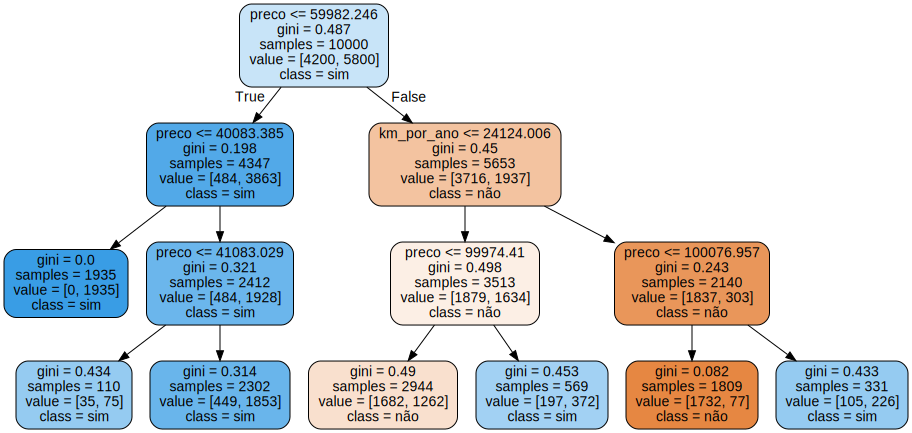

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["não", "sim"],
                feature_names = features)
graph = graphviz.Source(dot_data)
graph

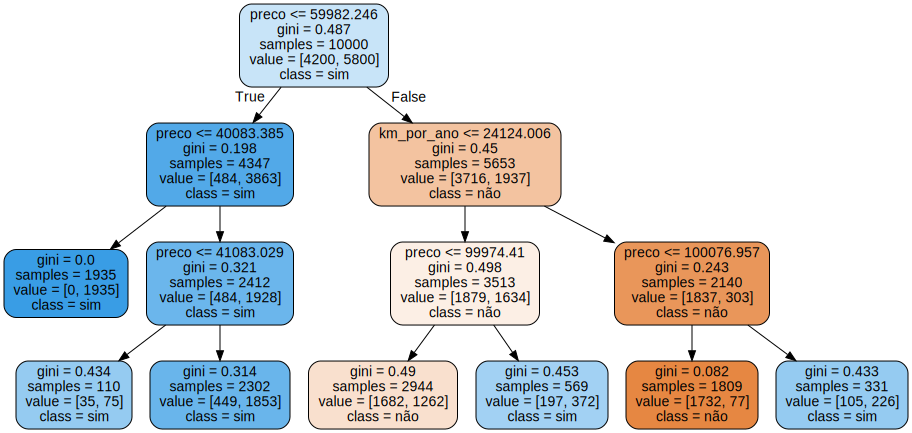

In [ ]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["não", "sim"],
                feature_names = features)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# GroupKFold para analisar como o modelo se comporta com novos grupos
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = df.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Testar valores de profundidade da árvore para saber qual é o melhor valor para este hiperparametro

In [ ]:
def run_decision_tree(depth):
  SEED=301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits=10)
  modelo = DecisionTreeClassifier(max_depth=depth)
  results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=df.modelo, return_train_score=False)
  imprime_resultados(results)

for fit in range(1, 32):
  print(fit)
  run_decision_tree(fit)  

1
Accuracy médio 75.78
Intervalo [73.67, 77.90]
2
Accuracy médio 75.78
Intervalo [73.67, 77.90]
3
Accuracy médio 78.67
Intervalo [76.40, 80.94]
4
Accuracy médio 78.63
Intervalo [76.41, 80.86]
5
Accuracy médio 78.56
Intervalo [76.42, 80.69]
6
Accuracy médio 78.12
Intervalo [75.53, 80.72]
7
Accuracy médio 77.96
Intervalo [75.74, 80.19]
8
Accuracy médio 77.86
Intervalo [75.81, 79.91]
9
Accuracy médio 77.38
Intervalo [75.28, 79.48]
10
Accuracy médio 77.19
Intervalo [75.26, 79.13]
11
Accuracy médio 76.97
Intervalo [74.71, 79.23]
12
Accuracy médio 76.49
Intervalo [74.66, 78.33]
13
Accuracy médio 75.81
Intervalo [73.79, 77.82]
14
Accuracy médio 75.66
Intervalo [73.64, 77.68]
15
Accuracy médio 75.16
Intervalo [72.93, 77.38]
16
Accuracy médio 75.11
Intervalo [73.31, 76.90]
17
Accuracy médio 74.74
Intervalo [72.48, 76.99]
18
Accuracy médio 74.33
Intervalo [71.92, 76.74]
19
Accuracy médio 74.34
Intervalo [72.03, 76.64]
20
Accuracy médio 74.22
Intervalo [71.83, 76.62]
21
Accuracy médio 73.80
Inter

In [ ]:
# quanto maior a profundidade, maior o overfitting

# Encontrar os hiperparametros por GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
SEED = 301
np.random.seed(SEED)

parameters_space = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

search = GridSearchCV(DecisionTreeClassifier(), 
                      parameters_space,
                      cv= KFold(n_splits=10))

search.fit(x_azar, y_azar, groups = df.modelo)
resultados = pd.DataFrame(search.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011251,0.001046,0.001484,0.000233,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.831,0.81,0.803,0.805,0.774,0.768,0.755,0.776,0.774,0.771,0.7867,0.022681,1
1,0.011302,0.000914,0.001485,0.000245,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.831,0.81,0.803,0.805,0.774,0.768,0.755,0.776,0.774,0.771,0.7867,0.022681,1
2,0.010739,0.000334,0.001345,0.000030,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.831,0.81,0.803,0.805,0.774,0.768,0.755,0.776,0.774,0.771,0.7867,0.022681,1
3,0.010863,0.000497,0.001353,0.000044,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.831,0.81,0.803,0.805,0.774,0.768,0.755,0.776,0.774,0.771,0.7867,0.022681,1
4,0.010647,0.000139,0.001413,0.000121,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.831,0.81,0.803,0.805,0.774,0.768,0.755,0.776,0.774,0.771,0.7867,0.022681,1


In [ ]:
print(search.best_params_)
print(search.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [ ]:
model = search.best_estimator_
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(x_azar)
accuracy_score(predictions, y_azar)*100

# quao bem isso será executado no mundo real?
# utilizar o predict é muito otimista, evitar essa abordagem

78.75

No caso de cross validation com busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation, que nao funciona por um bug do sklearn, por isso devemos usar o KFold

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(search, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))
scores.mean(), scores.std()


(0.7859999999999999, 0.008596510920135005)

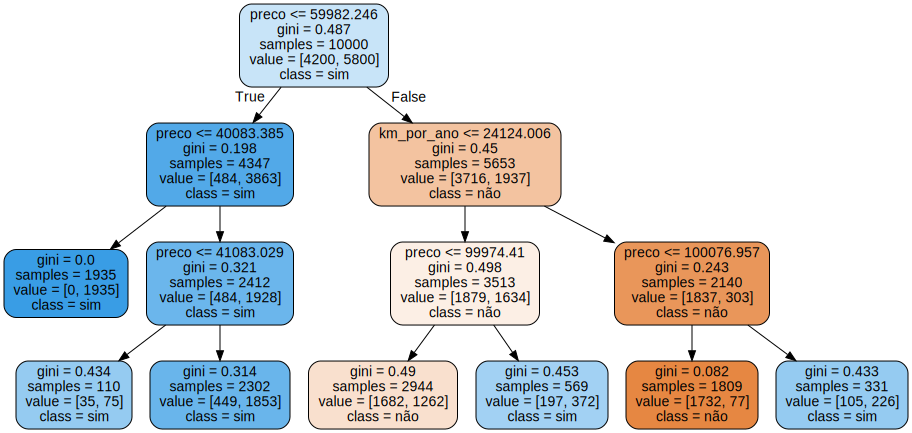

In [ ]:
model.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True,
                           class_names=["não", "sim"],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# melhor modelo real
# para selecionar o melhor estimador dependo de validar (cruzada) e hiperparametros